In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
F_10point = [[  8.34360564e-08,   1.89022714e-05,  -3.73041652e-03],[  1.94501963e-05,   1.19512678e-06,  -5.90813947e-02],[ -3.16737708e-03,   5.30589622e-02,   9.96830069e-01]]
F_big = [[  1.75345969e-07,   1.87353876e-05,  -3.69560210e-03], [  1.92508173e-05,   9.79548859e-07,  -5.72239187e-02],[ -3.15390413e-03,   5.12220927e-02,   9.97034661e-01]]
F = F_10point
Matr = F
#normal = np.max(Matr)
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
Linex = np.arange(0,384,1)
frameIndex = 0

In [2]:
###################################
#Locate Features; single frame test
###################################
print(np.max(FrameL[frameIndex]))
fL = tp.locate(FrameL[frameIndex], 3, minmass=10) 
fL.head()

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,246.184615,66.758974,57.142332,0.838191,0.445255,16.996181,212.0,0.002786,0
1,255.875587,67.098592,124.834017,0.851676,0.330097,34.285399,316.0,0.001869,0
2,239.931915,69.931915,137.727671,0.853030,0.181287,37.508813,341.0,0.001732,0
3,247.069717,72.917211,134.504257,0.863191,0.230994,34.285399,533.0,0.001108,0
4,237.064171,74.133690,54.798031,0.830566,0.534884,16.996181,184.0,0.003210,0


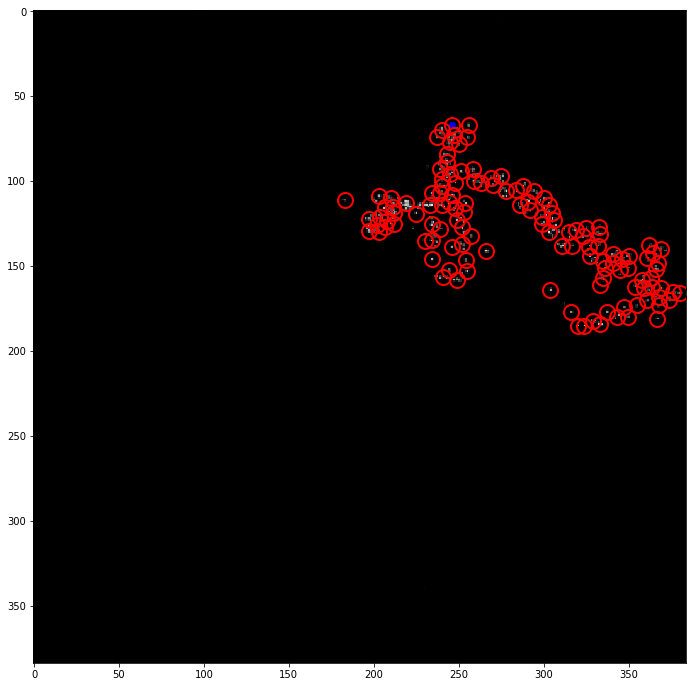

In [3]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(fL['x'].iloc[0],fL['y'].iloc[0],'o',color='b')
tp.annotate(fL, FrameL[frameIndex]);

In [4]:
print(np.max(FrameR[frameIndex]))
fR = tp.locate(FrameR[frameIndex], 3, minmass=10) 
fR.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,198.102990,60.109635,83.856106,0.847117,0.347222,23.680296,247.0,0.001577,0
1,210.071705,60.023256,143.753325,0.850217,0.332440,39.838615,357.0,0.001091,0
2,192.178571,63.981293,163.811928,0.849169,0.316038,45.689041,472.0,0.000825,0
3,201.050667,63.978667,104.471893,0.840635,0.177358,30.645089,332.0,0.001173,0
4,185.005420,66.178862,102.800343,0.839409,0.265385,30.366497,321.0,0.001213,0


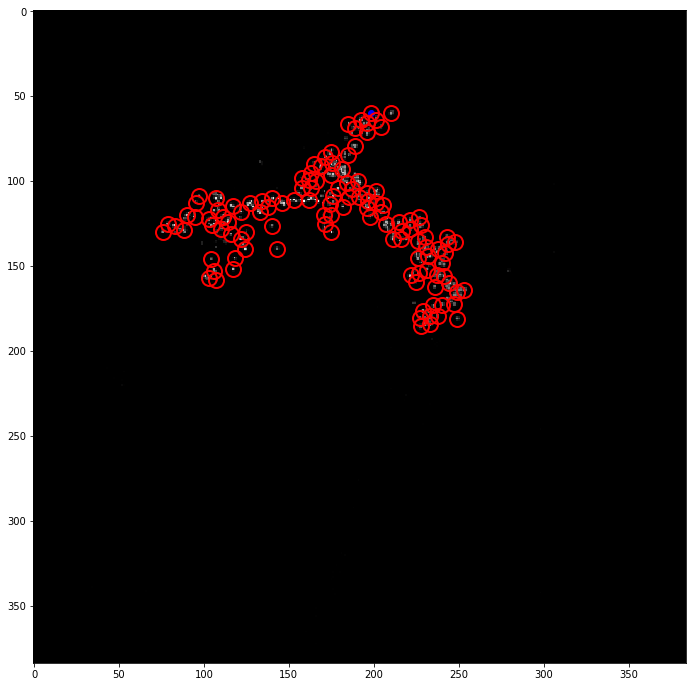

122


In [5]:
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(fR['x'].iloc[0],fR['y'].iloc[0],'o',color='b')
tp.annotate(fR, FrameR[frameIndex]);
print(len(fR))

/Users/pinghanchu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


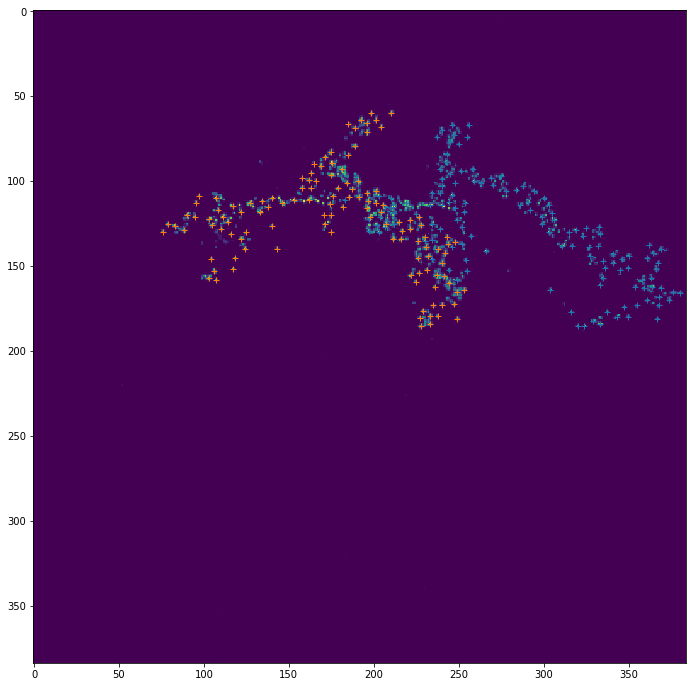

In [6]:
plt.figure(figsize = (12,12))
T0 = (fL['x'].iloc[0],fL['y'].iloc[0])
T1 = (fR['x'].iloc[0],fR['y'].iloc[0])

theta = math.pi*20./180.
fLx = np.array(fL['x']-T0[0])
fLy = np.array(fL['y']-T0[1])
fLr = np.sqrt(np.power(fLx,2)+np.power(fLy,2))
fLtheta = np.arccos(fLx/fLr)
fLtheta_rot = fLtheta + theta
fLx_rot = fLr*np.cos(fLtheta_rot)*1.
fLy_rot = fLr*np.sin(fLtheta_rot)*1.
#print(fLr, fLr, fLtheta_rot,fLx_rot)
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.plot(fL['x'],fL['y'],'+')
plt.plot(fR['x'],fR['y'],'+')
#plt.plot(fL['x']-T0[0],fL['y']-T0[1],'o')
#plt.plot(fLx_rot+T1[0],fLy_rot+T1[1],'+')
plt.show()


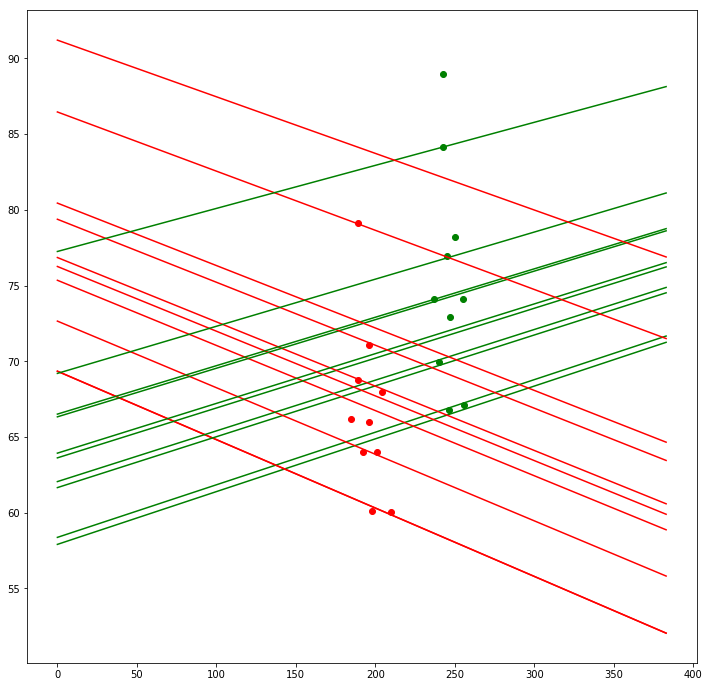

In [7]:
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
#for ii in range(230,len(fL)):
for ii in range(0,10):
    xL = fL['x'].iloc[ii]
    yL = fL['y'].iloc[ii]
    xR = fR['x'].iloc[ii]
    yR = fR['y'].iloc[ii]   
    ipL_i = [xL,yL,1]
    ipR_i = [xR,yR,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineL = np.dot(ipR_i,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyL,color='g')
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyR,color='r')
    dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    #FF = dlr + drl
    #print(ii,xL,yL,xR,yR,dlr,drl)
plt.show()

[0, 0, 0.5594358889716586]
[1, 1, 0.32013823640035094]
[2, 2, 0.4388686017235462]
[3, 2, 0.3182845853083832]
[4, 3, 2.3704574632635698]
[5, 3, 1.7779679301702753]
[6, 4, 0.405945282965846]
[7, 4, 0.08414079993662212]
[8, 6, 0.28725733026220374]
[9, 8, 0.05599121408990298]
[10, 9, 3.4072867766294506]
[11, 9, 0.9956378631317597]
[12, 9, 2.3021730243266143]
[13, 10, 0.40791478170956585]
[14, 12, 0.8396471066728097]
[15, 13, 1.894240843860389]
[16, 15, 0.21800754052098892]
[17, 16, 0.9475210065541995]
[18, 17, 0.3787901096666819]
[19, 20, 0.3052247182715292]
[20, 21, 0.8669867356224534]
[21, 21, 0.7027639581735091]
[22, 23, 0.11537550440346254]
[23, 25, 0.15136241356257085]
[24, 27, 0.33348758395355693]
[25, 26, 0.44624698426477766]
[26, 28, 0.3502318331793467]
[27, 31, 0.8044054620986101]
[28, 30, 0.9080787217962278]
[29, 34, 0.09649304255575256]
[30, 29, 0.6582660330550868]
[31, 32, 0.05816116726226909]
[32, 36, 0.060447857049457744]
[33, 36, 0.07904019796754987]
[34, 34, 0.4577682864082

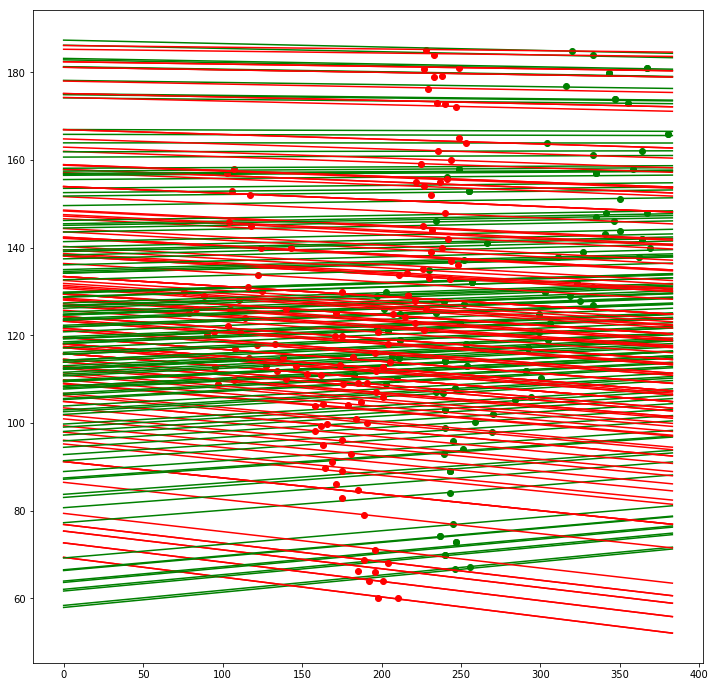

In [8]:
plt.figure(figsize=(12,12))
pairR = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for ir in range(0,len(fR)):
#for ir in range(1,3):
    Min = 10000
    MinIndex = 0
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixL)
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for il in range(0,len(fL)):
    #for il in range(0,10):
        xL = fL['x'].iloc[il]
        yL = fL['y'].iloc[il]
        ipL_i = [xL,yL,1]
        LineR = np.dot(ipL_i,MatrixR) 
        #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
        #plt.plot(xL,yL,'o',color='g')
        #plt.plot(Linex,LineyL,color='g')
        #plt.plot(xR,yR,'o',color='r')
        #plt.plot(Linex,LineyR,color='r')
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        #plt.plot(xL,yL,'o',color='g')
        #print(ir,xR,yR,il,xL,yL,dlr,drl)        
        if(FF<Min):
            Min = FF
            MinIndex = il
    xL = fL['x'].iloc[MinIndex]
    yL = fL['y'].iloc[MinIndex] 
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1] 
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    ipair = [ir,MinIndex,Min]
    print(ipair)
    pairR.append(ipair)
plt.show()


[1, 0, 0.32608361747626124]
[1, 1, 0.32013823640035094]
[3, 2, 0.3182845853083832]
[5, 3, 1.7779679301702753]
[7, 4, 0.08414079993662212]
[6, 5, 0.8493701738068695]
[8, 6, 0.28725733026220374]
[8, 7, 2.5065630664572174]
[9, 8, 0.05599121408990298]
[11, 9, 0.9956378631317597]
[13, 10, 0.40791478170956585]
[13, 11, 1.2985076894722816]
[14, 12, 0.8396471066728097]
[15, 13, 1.894240843860389]
[16, 14, 1.7396849048475873]
[16, 15, 0.21800754052098892]
[17, 16, 0.9475210065541995]
[18, 17, 0.3787901096666819]
[19, 18, 0.8443819889021158]
[18, 19, 1.2600396965042684]
[19, 20, 0.3052247182715292]
[21, 21, 0.7027639581735091]
[20, 22, 1.1329473537348385]
[22, 23, 0.11537550440346254]
[23, 24, 0.7085089675154375]
[23, 25, 0.15136241356257085]
[25, 26, 0.44624698426477766]
[24, 27, 0.33348758395355693]
[26, 28, 0.3502318331793467]
[30, 29, 0.6582660330550868]
[29, 30, 0.6821219111804742]
[27, 31, 0.8044054620986101]
[31, 32, 0.05816116726226909]
[31, 33, 0.5500603863158946]
[29, 34, 0.09649304255

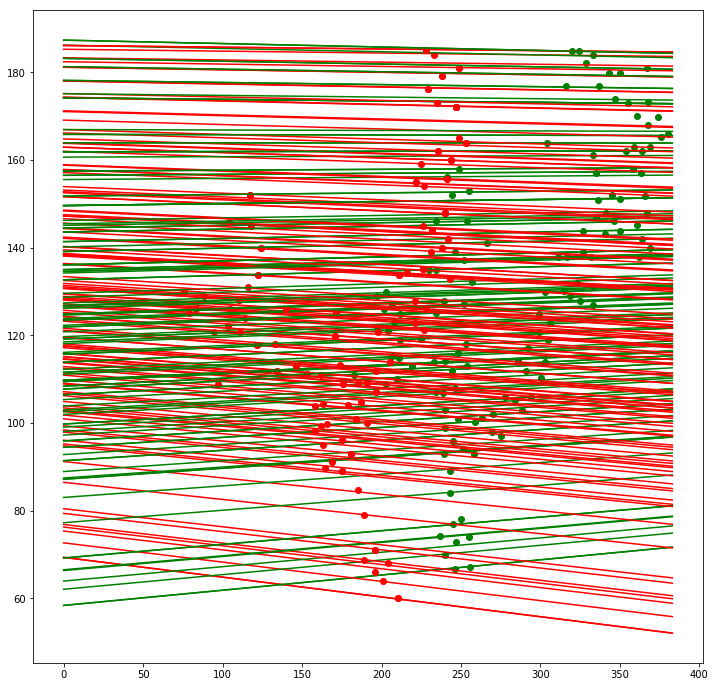

In [9]:
plt.figure(figsize=(12,12))
pairL = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for il in range(0,len(fL)):
#for il in range(10,13):
    Min = 10000
    MinIndex = 0
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixR)
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for ir in range(0,len(fR)):
        xR = fR['x'].iloc[ir]
        yR = fR['y'].iloc[ir]
        ipR_i = [xR,yR,1]
        LineL = np.dot(ipR_i,MatrixL) 
        LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl     
        if(FF<Min):
            Min = FF
            MinIndex = ir
    xR = fR['x'].iloc[MinIndex]
    yR = fR['y'].iloc[MinIndex] 
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1] 
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    ipair = [MinIndex,il,Min]
    print(ipair)
    pairL.append(ipair)
plt.show()

In [10]:
#for ir in range(len(pairR)):
    #print(pairR[ir])

In [11]:
#for i1 in range(len(pairL)):
    #print(pairL[i1])

In [12]:
pair=[]
for ir in range(len(pairR)):
    for il in range(len(pairL)):
        RR = pairR[ir][0]
        RL = pairR[ir][1]
        LR = pairL[il][0]
        LL = pairL[il][1]
        if(RR == LR and RL == LL):
            ipair = [RR,RL]
            pair.append(ipair)
#for ii in range(len(pair)):
    #print(pair[ii])            

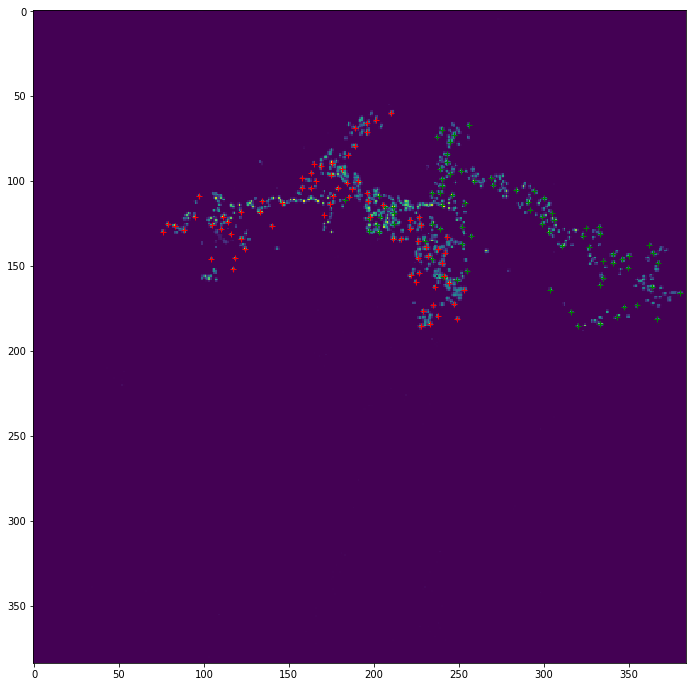

In [13]:
plt.figure(figsize=(12,12))
Data = []
for i in range(len(pair)):
    ir = pair[i][0]
    il = pair[i][1]
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    massR = fR['mass'].iloc[ir]
    massL = fL['mass'].iloc[il]
    idata = [ir,il,massR,xR,yR,massL,xL,yL]
    Data.append(idata)
    #df = pd.DataFrame(data)
    ipR = [xR,yR,1]
    ipL = [xL,yL,1]
    LineR = np.dot(ipL,MatrixR) 
    LineL = np.dot(ipR,MatrixL) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    #plt.figure(figsize=(12,12))
    #plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
    #plt.plot(Linex,LineyR,color='r')
    #plt.plot(Linex,LineyL,color='g')    
    plt.plot(xR,yR,'+',color='r')
    plt.plot(xL,yL,'+',color='g')
    #plt.savefig("frame_{}_track_{}.tif".format(frameIndex, i))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.show()

In [14]:
df = pd.DataFrame(Data)
df.columns = ['PID_R','PID_L', 'Mass_R','X_R','Y_R','Mass_L','X_L','Y_L']
df.head()

,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,1,1,143.753325,210.071705,60.023256,124.834017,255.875587,67.098592
1,3,2,104.471893,201.050667,63.978667,137.727671,239.931915,69.931915
2,5,3,95.556958,196.099125,66.002915,134.504257,247.069717,72.917211
3,7,4,85.806248,188.964286,68.785714,54.798031,237.064171,74.133690
4,8,6,159.633053,196.090750,71.078534,192.525702,244.981735,76.961948


In [15]:
df.to_csv("PointPair_Frame_{}.csv".format(frameIndex))

In [16]:
df

,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,1,1,143.753325,210.071705,60.023256,124.834017,255.875587,67.098592
1,3,2,104.471893,201.050667,63.978667,137.727671,239.931915,69.931915
2,5,3,95.556958,196.099125,66.002915,134.504257,247.069717,72.917211
3,7,4,85.806248,188.964286,68.785714,54.798031,237.064171,74.133690
4,8,6,159.633053,196.090750,71.078534,192.525702,244.981735,76.961948
5,9,8,187.770816,188.872404,79.115727,120.438453,242.919708,84.131387
6,11,9,88.034982,184.958861,84.803797,202.195942,242.930435,88.972464
7,13,10,203.371952,175.131507,89.136986,76.482813,239.203065,92.977011
8,14,12,72.155254,164.729730,89.776062,96.116332,251.118902,94.143293
9,15,13,212.008295,168.952694,91.039422,109.889099,244.941333,95.866667
